In [2]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.ensemble import RandomForestClassifier


#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.utils.class_weight import compute_class_weight

from joblib import parallel_backend
from joblib import Parallel, delayed


In [3]:

print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

mfilename='/shares/kslotkin_share/private/tratnayake/frNAnet/R_FG/URFGmodels/RFC_S05141321_URrp_FG_wg_v1.pkl'

# load the model from disk
rfc_v1 = pickle.load(open(mfilename, 'rb'))


loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [4]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

comb_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/frNAnet/R_FG/pred/S10180817_dinuc_df.txt',header=0,sep='\t')



loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [5]:
print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(comb_df)



shuf_comb_df=comb_df.iloc[np.random.permutation(len(comb_df))]



shuf_comb_df=shuf_comb_df.reset_index(drop=True)

shuf_comb_df.info()


input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246242 entries, 0 to 1246241
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   seq_id   1246242 non-null  object 
 1   5p       1246242 non-null  int64  
 2   3p       1246242 non-null  int64  
 3   strand   1246242 non-null  int64  
 4   ptype    1246242 non-null  int64  
 5   length   1246242 non-null  int64  
 6   gc_cont  1246242 non-null  float64
 7   AA       1246242 non-null  int64  
 8   AC       1246242 non-null  int64  
 9   AG       1246242 non-null  int64  
 10  AT       1246242 non-null  int64  
 11  CA       1246242 non-null  int64  
 12  CC       1246242 non-null  int64  
 13  CG       1246242 non-null  int64  
 14  CT       1246242 non-null  int64  
 15  GA       1246242 non-null  int64  
 16  GC       1246242 non-null  int64  
 17  GG       1246242 non-null  int64  
 18  GT       1246242 non-null  int6

In [6]:
ydt=shuf_comb_df['ptype']
xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)


In [7]:
with parallel_backend('threading',n_jobs=48 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    
    y_pred = rfc_v1.predict(xdt)

prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [8]:
print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt,y_pred)))




prediction accuracy score : 0.7400

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.79      0.81    860271
           1       0.57      0.64      0.60    385971

    accuracy                           0.74   1246242
   macro avg       0.70      0.71      0.70   1246242
weighted avg       0.75      0.74      0.74   1246242



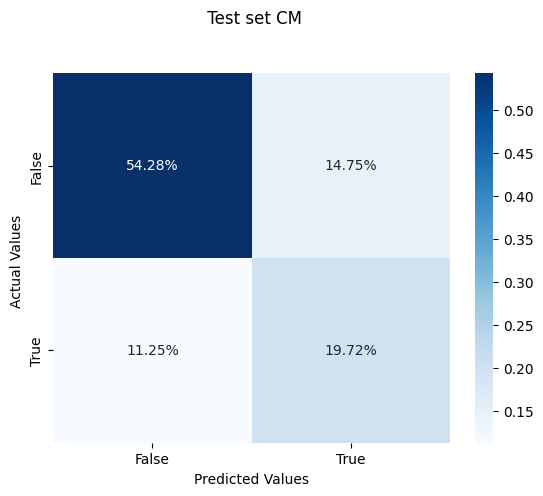

In [10]:
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()

fig1.savefig("RFC_S10180817_URrp_FG_wg_v1_pred.pdf")
